> # Canciones y artistas más populares en Spotify hasta el año 2021
***
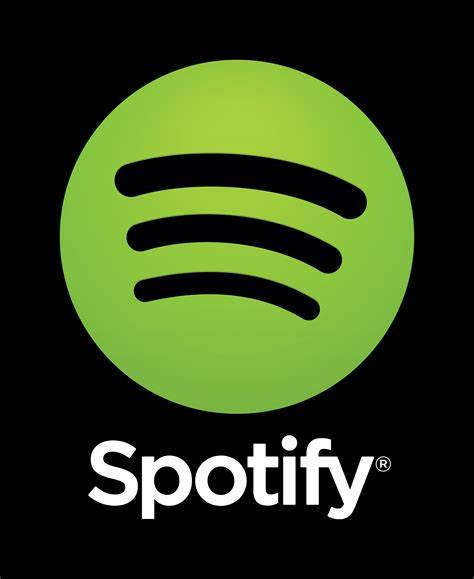




Spotify es un proveedor sueco de servicios de transmisión de audio y medios fundado en abril de 2006. Es el proveedor de servicios de transmisión de música más grande del mundo y tiene más de 381 millones de usuarios activos mensuales, que también incluye aproximadamente 172 millones de suscriptores pagos.

Aquí, exploraremos y cuantificaremos datos sobre música y extraeremos información valiosa.

Los datos comprenden un rango de fechas desde 1900-01-01 hasta 2021-04-16.


#### Descripción de las variables

* **id**: Identificador único de cada registro


* **name**: Nombre de la canción


* **popularity**: Popularidad


* **duration_ms**: Duracion en microsegundos


* **explicit**: indica si la canción contiene lenguaje explícito (0 = no, 1 = sí) 


* **artists**: Artista/artistas


* **id_artists**: Identificador de los artistas


* **release_date**: fecha de lanzamiento


* **danceability**: Spotify define esta cualidad, que podría ser traducida como bailiabilidad, midiendo cuánto de apta para bailar es la canción, basándose en una combinación de elementos musicales que incluye el tempo, la estabilidad rítmica, la intensidad del pulso y la regularidad general (de 0 a 1).


* **key**:	 tonalidad de la canción (0 = Do, 1 = Do#, 2 = Re, etc.)


* **loudness**:	nivel de sonoridad de la canción en decibelios (dB)


* **mode**: indica si la canción está en modo mayor (1) o menor (0)


* **speechiness**: Por speechiness se entiende la presencia de palabras habladas en el tema. Para pistas totalmente habladas, como un audiolibro, un recital de un poema, etc., el valor de este parámetro se acercará a 1.0.


* **instrumentalness**:	Este parámetro da información sobre la presencia de elementos vocales en la canción. Cuanto más próximo esté este valor a 1.0, mayor probabilidad de que el tema no tenga voces.


* **acousticness**: medida de la presencia de elementos acústicos en la canción (de 0 a 1)


* **tempo**: Velocidad con que se interpreta una composición musical.


* **valence**: es una medida de la positividad o negatividad de una canción. Se define como la medida de la "valencia musical" de una pista, que oscila entre 0 y 1, donde 0 es la pista más triste y 1 es la pista más feliz o alegre.


#### Objetivo

Anticipar los patrones de comportamiento de los usuarios y para ayudar a mejorar el servicio.

#### Contexto Comercial

Este análisis permitirá brindar una visión de posibles problemas y mejoras del servicio para poder ayudar a los artistas a 
saber que tipo de musuica esta mas de moda y por ende sea mas rentable.

#### Problema Comercial 

Algunos problemas comerciales que podrían surgir estan relacionados a musica con baja escuchabilidad en la plataforma lo que puede conllevar a perdidas para el artista. 

#### Contexto Analítico

Inicialmente se realiza un cuestionamiento a partir del objetivo, los problemas y el contexto comercial, dando lugar a las siguientes preguntas:

1. ¿Cúales son las canciones más populares?

2. Analizar las características de las canciones que son más o menos populares para comprender mejor lo que atrae a los usuarios, como el tempo, la energía, la instrumentalización, etc

3. ¿Cuanto a cambiado la produccion de musica a lo largo de los años?


***

>## Exploración y limpieza de los datos

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot
from datetime import timedelta, datetime
import statsmodels.api as sm

#Carga de archivos
os.getcwd()
os.chdir('C:\\Users\\fernando\\Desktop\\JOCE\\DataScience2023\\1ra entrega 14.01.23\\datasets')
df = pd.read_csv('Spoifyartistsandtracks.csv', encoding='latin-1')

#Modificación de los datos
df = df.dropna(axis=0)
df["release_date"]= pd.to_datetime(df["release_date"])
#se elimina atributo ya que es una composicion entre el tempo y el compás y no suma a los datos
df = df.drop(['time_signature'],axis=1) 

#Columnas agrgadas
df['year'] = df['release_date'].dt.year


display(df)

display(df.info())

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586666,5rgu12WBIHQtvej2MdHSH0,???,50,258267,0,['?YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,2020
586667,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,2020
586668,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,2020
586669,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,2021


<class 'pandas.core.frame.DataFrame'>
Int64Index: 586600 entries, 0 to 586670
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586600 non-null  object        
 1   name              586600 non-null  object        
 2   popularity        586600 non-null  int64         
 3   duration_ms       586600 non-null  int64         
 4   explicit          586600 non-null  int64         
 5   artists           586600 non-null  object        
 6   id_artists        586600 non-null  object        
 7   release_date      586600 non-null  datetime64[ns]
 8   danceability      586600 non-null  float64       
 9   energy            586600 non-null  float64       
 10  key               586600 non-null  int64         
 11  loudness          586600 non-null  float64       
 12  mode              586600 non-null  int64         
 13  speechiness       586600 non-null  float64       
 14  acou

None

In [2]:
print(f'Fechas: \nMínima {df.release_date.min()} y \nMáxima {df.release_date.max()}')

Fechas: 
Mínima 1900-01-01 00:00:00 y 
Máxima 2021-04-16 00:00:00


In [3]:
#el dataset ya no contiene valores nulos
df.isna().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
year                0
dtype: int64

> ## Análisis Exploratorio de Datos (EDA)

### Análisis general de los datos

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586600.0,27.573259,18.369398,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586600.0,230054.977869,126532.896474,3344.0,175085.2500,214907.000000,263867.00000,5621218.000
explicit,586600.0,0.044091,0.205298,0.0,0.0000,0.000000,0.00000,1.000
danceability,586600.0,0.563612,0.166101,0.0,0.4530,0.577000,0.68600,0.991
energy,586600.0,0.542072,0.251910,0.0,0.3430,0.549000,0.74800,1.000
key,586600.0,5.221592,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586600.0,-10.205780,5.089422,-60.0,-12.8910,-9.242000,-6.48100,5.376
mode,586600.0,0.658798,0.474113,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586600.0,0.104870,0.179903,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586600.0,0.449802,0.348812,0.0,0.0969,0.422000,0.78400,0.996


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'explicit'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'key'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'mode'),
 Text(7.5, 0, 'speechiness'),
 Text(8.5, 0, 'acousticness'),
 Text(9.5, 0, 'instrumentalness'),
 Text(10.5, 0, 'liveness'),
 Text(11.5, 0, 'valence'),
 Text(12.5, 0, 'tempo')]

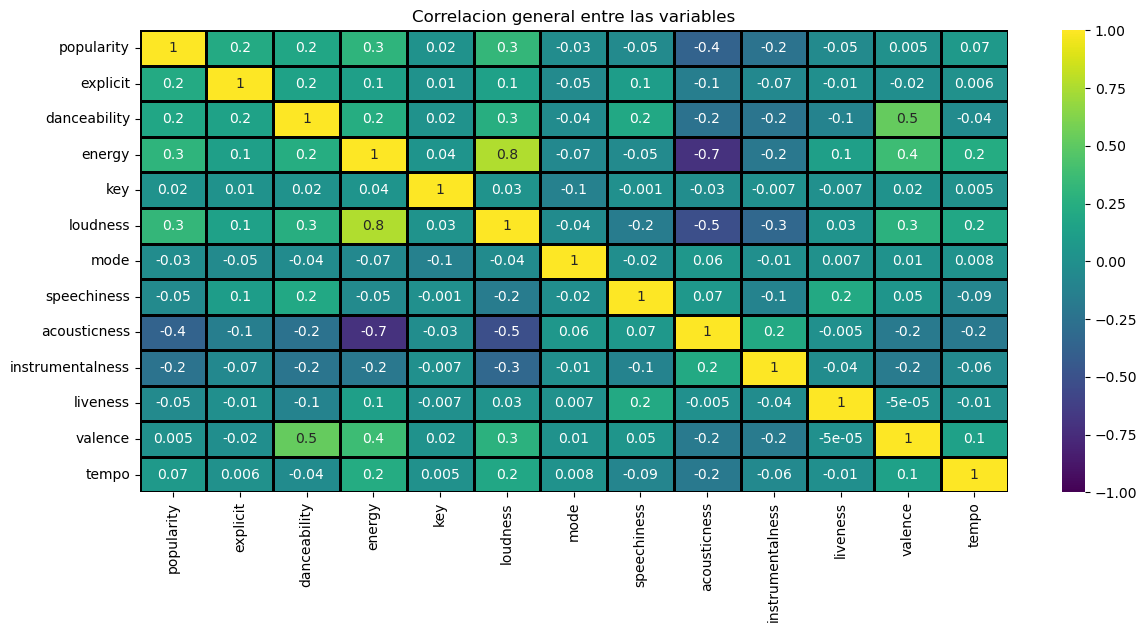

In [5]:
corr_df = df.drop(["duration_ms",'year'],axis=1).corr(method="pearson")
plt.figure(figsize= (14,6))
heatmap= sns.heatmap(corr_df,annot= True,fmt= ".1g", vmin=-1,vmax=1, center=0,cmap="viridis",linewidths=1,linecolor='black')
heatmap.set_title("Correlacion general entre las variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation = 90)

### 10 canciones más populares del 2021

In [6]:
Populares = df.query('popularity > 90', inplace = False).sort_values('popularity', ascending = False)

primeros10 = Populares[0:10]
display(primeros10[['name','popularity', 'artists','release_date']])


,name,popularity,artists,release_date
93801,Peaches (feat. Daniel Caesar & Giveon),100,"['Justin Bieber', 'Daniel Caesar', 'Giveon']",2021-03-19
93802,drivers license,99,['Olivia Rodrigo'],2021-01-08
93803,Astronaut In The Ocean,98,['Masked Wolf'],2021-01-06
92809,Save Your Tears,97,['The Weeknd'],2020-03-20
92810,telepatía,97,['Kali Uchis'],2020-12-04
92812,Blinding Lights,96,['The Weeknd'],2020-03-20
93804,Leave The Door Open,96,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",2021-03-05
92813,The Business,95,['Tiësto'],2020-09-16
91865,Streets,94,['Doja Cat'],2019-11-07
92815,Heartbreak Anniversary,94,['Giveon'],2020-03-27


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'explicit'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'key'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'mode'),
 Text(7.5, 0, 'speechiness'),
 Text(8.5, 0, 'acousticness'),
 Text(9.5, 0, 'instrumentalness'),
 Text(10.5, 0, 'liveness'),
 Text(11.5, 0, 'valence'),
 Text(12.5, 0, 'tempo')]

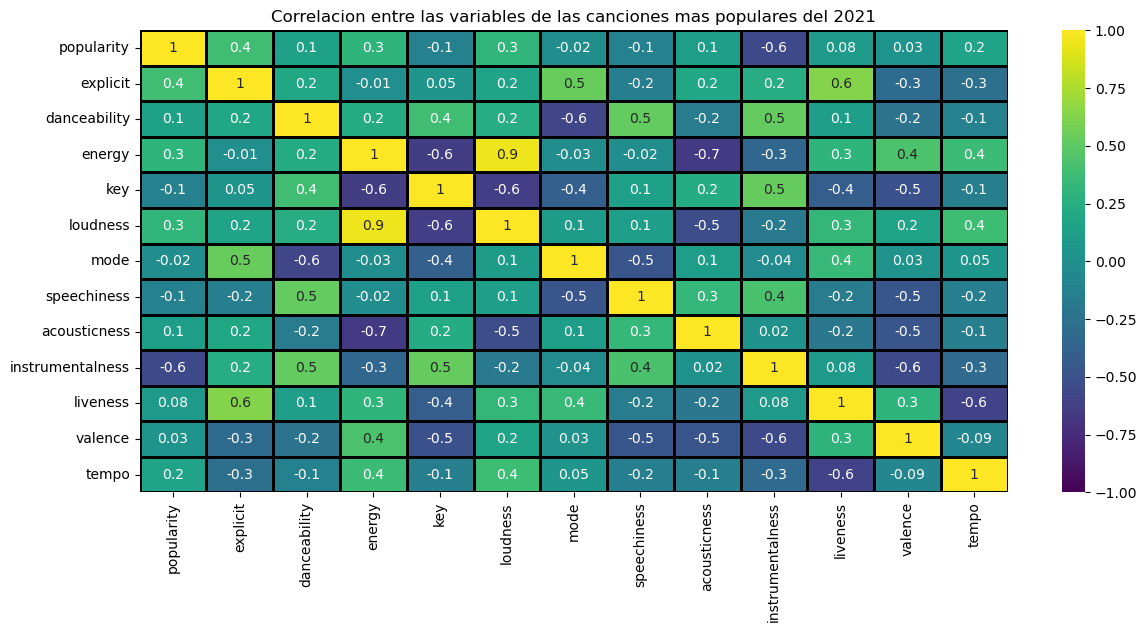

In [7]:
corr_df = primeros10.drop(["duration_ms",'year'],axis=1).corr(method="pearson")
plt.figure(figsize= (14,6))
heatmap= sns.heatmap(corr_df,annot= True,fmt= ".1g", vmin=-1,vmax=1, center=0,cmap="viridis",linewidths=1,linecolor='black')
heatmap.set_title("Correlacion entre las variables de las canciones mas populares del 2021")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation = 90)

[Text(0.5, 1.0, 'Correlación entre Loudness vs Energy')]

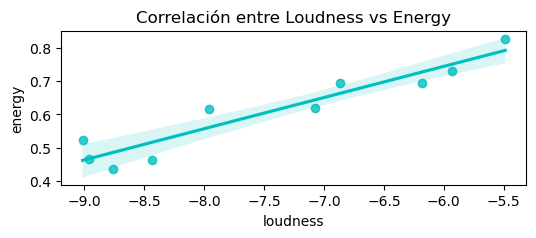

In [21]:
plt.figure(figsize=(6,2))
sns.regplot(data=primeros10, x="loudness", y="energy", color="c").set(title="Correlación entre Loudness vs Energy")

[Text(0.5, 1.0, 'Correlación entre Acousticness vs Energy')]

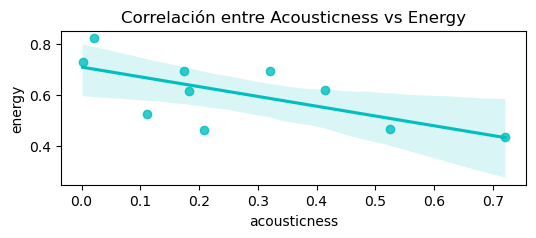

In [20]:
plt.figure(figsize=(6,2))
sns.regplot(data=primeros10, y="energy", x="acousticness", color="c").set(title="Correlación entre Acousticness vs Energy")

### 100 últimas canciones del ranking del 2021

In [11]:
NoPopulares = df.query('popularity < 1', inplace = False).sort_values('popularity', ascending = True)

ultimos100 = NoPopulares[0:100]
display(ultimos100[['name','popularity', 'artists','release_date']])

,name,popularity,artists,release_date
1,Capítulo 2.16 - Banquero Anarquista,0,['Fernando Pessoa'],1922-06-01
135518,Let's Try Again,0,['Jimmie Lunceford'],1939-01-01
135519,My Melancholy Baby,0,['Jimmie Lunceford'],1939-01-01
135520,"So Far, So Good",0,['Charlie Barnet'],1939-01-01
135521,I've Only Myself to Blame,0,['Jimmie Lunceford'],1939-01-01
...,...,...,...,...
135427,"Lookie, Lookie, Lookie, Here Comes Cookie",0,['Lew Stone'],1938-01-01
135428,Breakin' the ice,0,"['Bob Howard & His Orchestra', 'Bob Howard']",1938-01-01
135429,Sixth Street,0,['Lil Armstrong'],1938-01-01
135431,Boogie woogie man,0,"['Pete Johnson', 'Albert Ammons']",1938-01-01


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'explicit'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'key'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'mode'),
 Text(7.5, 0, 'speechiness'),
 Text(8.5, 0, 'acousticness'),
 Text(9.5, 0, 'instrumentalness'),
 Text(10.5, 0, 'liveness'),
 Text(11.5, 0, 'valence'),
 Text(12.5, 0, 'tempo')]

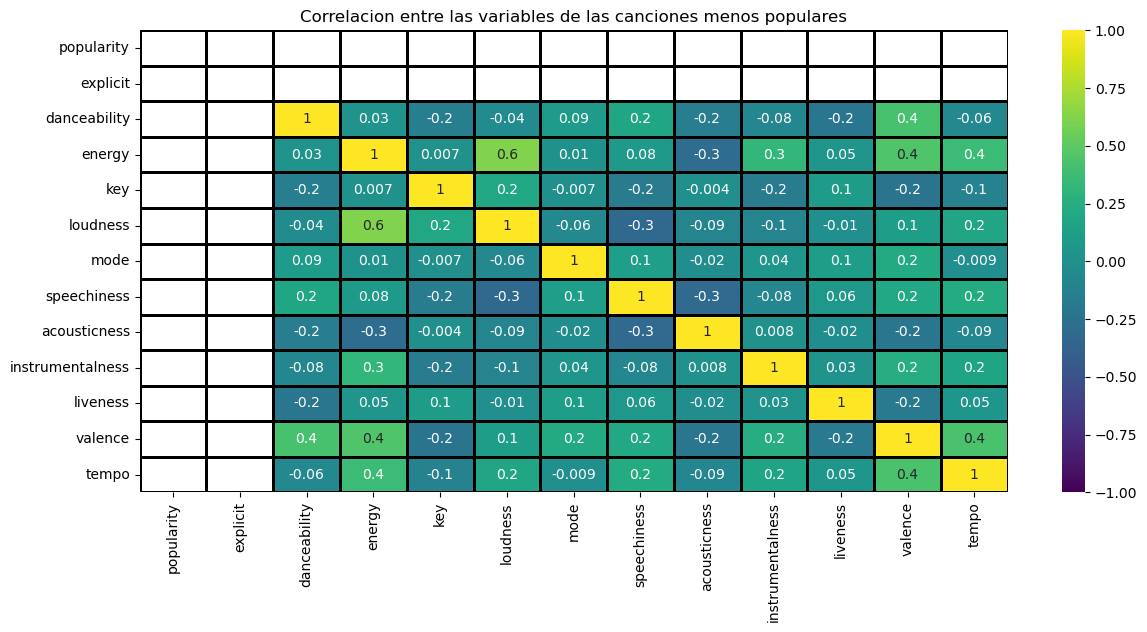

In [12]:
corr_df = ultimos100.drop(["duration_ms", "year"],axis=1).corr(method="pearson")
plt.figure(figsize= (14,6))
heatmap= sns.heatmap(corr_df,annot= True,fmt= ".1g", vmin=-1,vmax=1, center=0,cmap="viridis",linewidths=1,linecolor='black')
heatmap.set_title("Correlacion entre las variables de las canciones menos populares")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation = 90)

[Text(0.5, 1.0, 'Correlación entre Loudness vs Energy')]

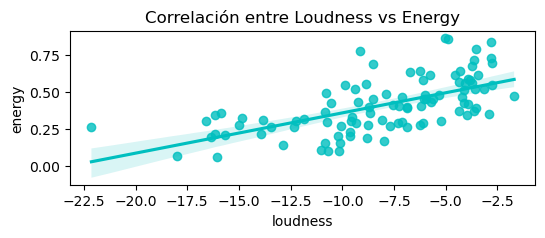

In [23]:
plt.figure(figsize=(6,2))
sns.regplot(data=ultimos100, y="energy", x="loudness", color="c").set(title="Correlación entre Loudness vs Energy")

En este caso poodemos ver que aunque en menor medida, la energía y los decibeles de las caniones siguen estrechamente relcionados teniendo en cuanta también que la fecha de lanzamiento de estas canciones esde casi 90 años atrás

### Evolucion de la musica hasta el 2021

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

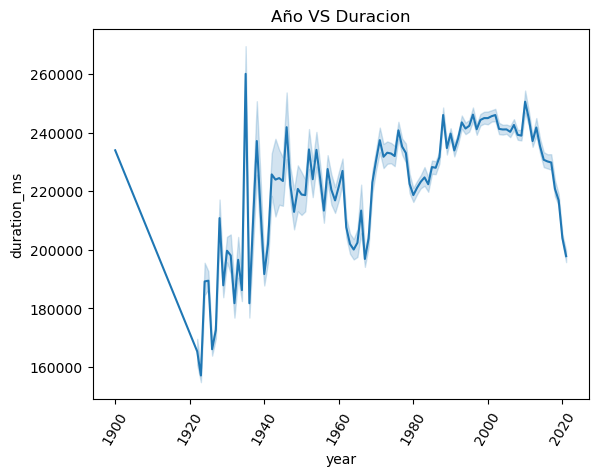

In [15]:
total = df.duration_ms
fig_dims = (10,5)
fig = sns.lineplot(x = df.year, y = total).set(title = "Año VS Duracion")
plt.xticks(rotation = 60)

<Figure size 1000x600 with 0 Axes>

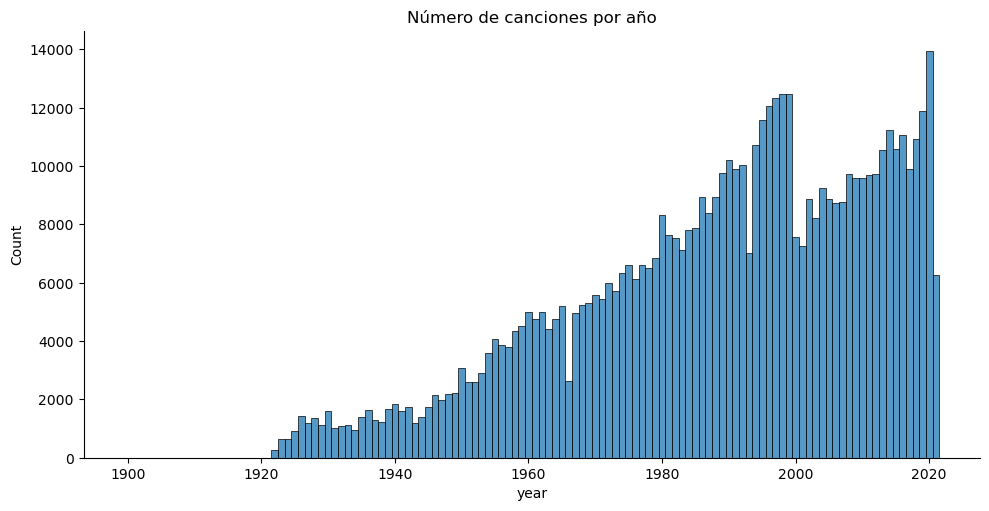

In [16]:
plt.figure(figsize=(10,6))
sns.displot(df['year'], discrete=True, aspect=2, height=5, kind="hist").set(title="Número de canciones por año")

Podemos ver fácilmente un aumento en la cantidad de música producida por año

> ### Conclusión

En línea general podemos ver que la energía de las canciones y la sonoridad o decibeles tienen una muy buena relación, por lo que se puede intuir que mayormente se busca hacer canciones con mucha energía y rudos altos, lo podemos ver también que estos dos atributos tienen un número relevante en la popularidad de las canciones. Pero, por otra parte, podemos ver que mientras más energía tiene la canción menos acústica y menos ruidosas son estas, por lo tanto estos atributos, tanto la acústica y la instrumentación no son tan populares en el ranking, lo que nos llevaria a pensar que mayormente se buscan canciones con sonidos mas artificiales y electronicos. 

Podemos ver también una relación bastante buena entre la bailabilidad de las canciones con el nivel de ánimo que transmiten estas.